In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import warnings 
warnings.filterwarnings("ignore")

In [4]:
dataset = pd.read_csv('C:/Users/Mehmet Alpay/Desktop/Software/anaconda kodlama/applerevenue .csv')
dataset = shuffle(dataset)
dataset.head()

,date,open,high,low,close,volume,profit or not
9646,19-03-2019,45.7156,45.8710,45.1258,45.2739,126585476,1
5329,23-01-2002,0.3512,0.3512,0.3291,0.3509,443279200,1
8533,14-10-2014,22.5297,22.5589,22.1212,22.1616,254754248,1
5605,27-02-2003,0.2221,0.2287,0.2212,0.2265,154341600,0
8779,06-10-2015,25.2503,25.5036,25.0528,25.4055,195427908,0


In [5]:
dataset.describe()

,open,high,low,close,volume,profit or not
count,10559.000000,10559.000000,10559.000000,10559.000000,1.055900e+04,10559.000000
mean,15.308827,15.483090,15.139373,15.318012,3.263275e+08,0.476466
std,33.973113,34.385796,33.580974,34.000790,3.201156e+08,0.499469
min,0.038800,0.038800,0.038400,0.038400,1.001504e+06,0.000000
25%,0.236800,0.242500,0.231650,0.236900,1.219792e+08,0.000000
50%,0.400200,0.406600,0.393000,0.399300,2.159780e+08,0.000000
75%,13.652700,13.783300,13.504000,13.647150,4.074518e+08,1.000000
max,181.877900,182.186600,178.382400,181.260500,2.147484e+09,1.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10559 entries, 9646 to 7904
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10559 non-null  object 
 1   open           10559 non-null  float64
 2   high           10559 non-null  float64
 3   low            10559 non-null  float64
 4   close          10559 non-null  float64
 5   volume         10559 non-null  int64  
 6   profit or not  10559 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 659.9+ KB


In [7]:
dataset.isnull().sum()

date             0
open             0
high             0
low              0
close            0
volume           0
profit or not    0
dtype: int64

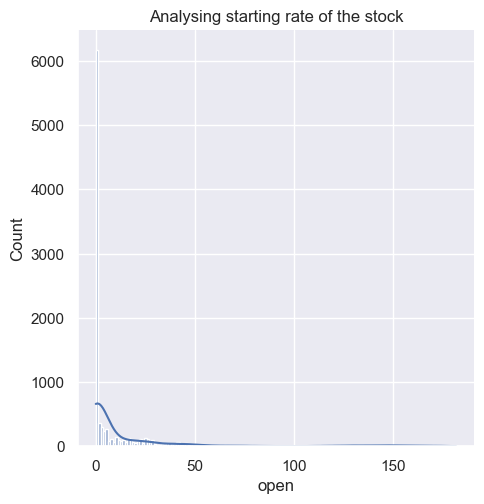

In [8]:
sns.set()
sns.displot(data=dataset, x='open', kde=True, linewidth=1) 
plt.title("Analysing starting rate of the stock")
plt.show()

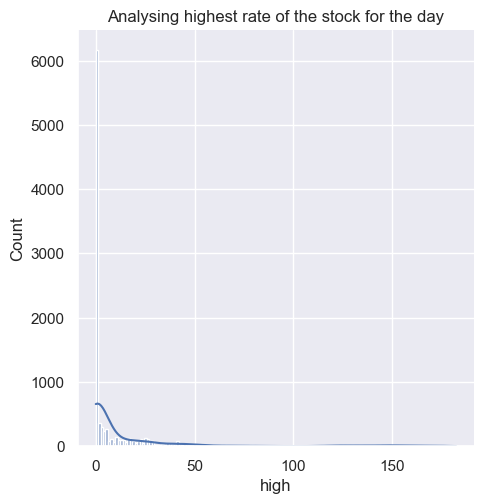

In [9]:
sns.displot(data=dataset, x='high', kde=True, linewidth=1)
plt.title('Analysing highest rate of the stock for the day')
plt.show()

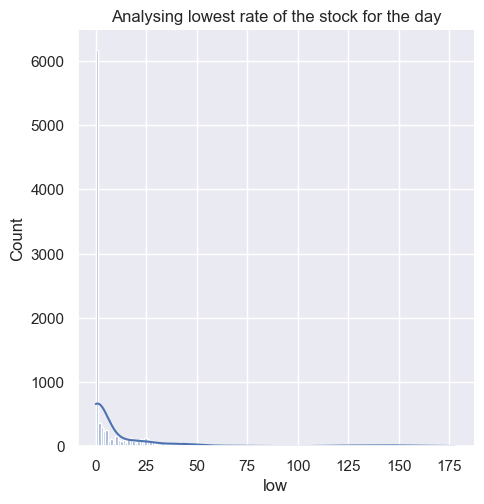

In [10]:
sns.displot(data=dataset, x='low', kde=True, linewidth=1)
plt.title('Analysing lowest rate of the stock for the day')
plt.show()

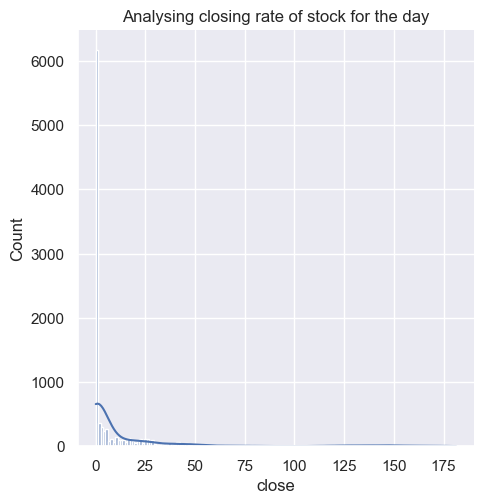

In [11]:
sns.displot(data=dataset, x='close', kde=True, linewidth=1)
plt.title('Analysing closing rate of stock for the day')
plt.show()

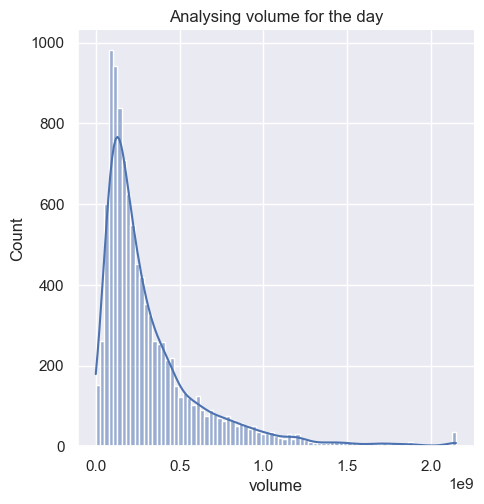

In [12]:
sns.displot(data=dataset, x='volume', kde=True, linewidth=1)
plt.title('Analysing volume for the day')
plt.show()

In [13]:
X = dataset.drop(columns=['date', 'profit or not', 'volume'])
Y = dataset['profit or not']
X.head()

,open,high,low,close
9646,45.7156,45.8710,45.1258,45.2739
5329,0.3512,0.3512,0.3291,0.3509
8533,22.5297,22.5589,22.1212,22.1616
5605,0.2221,0.2287,0.2212,0.2265
8779,25.2503,25.5036,25.0528,25.4055


In [14]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

((8447, 4), (2112, 4), (8447,), (2112,))

In [15]:
training_model = LogisticRegression()
training_model.fit(x_train, y_train)
y_train_prediction = training_model.predict(x_train)
y_train_prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
training_model.score(x_train, y_train)

0.7946016337161123

In [17]:
training_cf_matrix = confusion_matrix(y_train, y_train_prediction)
training_cf_matrix

array([[4450,    3],
       [1732, 2262]], dtype=int64)

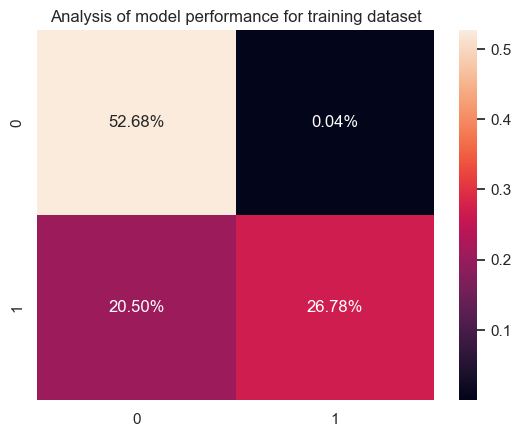

In [18]:
sns.heatmap(training_cf_matrix/np.sum(training_cf_matrix), annot=True, fmt='.2%')
plt.title('Analysis of model performance for training dataset')
plt.show()

In [19]:
y_test_prediction = training_model.predict(x_test)
y_test_prediction

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [20]:
training_model.score(x_test, y_test)

0.7803030303030303

In [21]:
testing_cf_matrix = confusion_matrix(y_test, y_test_prediction)
testing_cf_matrix

array([[1075,    0],
       [ 464,  573]], dtype=int64)

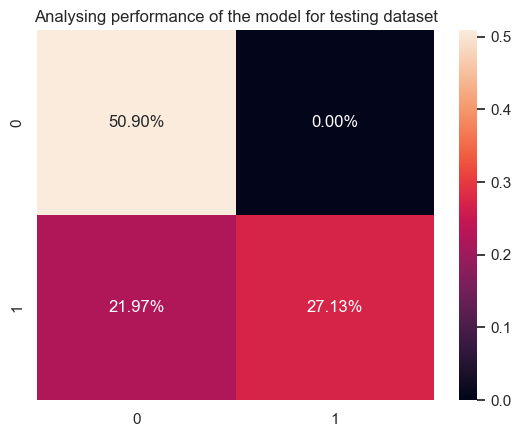

In [22]:
sns.heatmap(testing_cf_matrix/np.sum(testing_cf_matrix), annot=True, fmt='0.2%')
plt.title('Analysing performance of the model for testing dataset')
plt.show()

In [23]:
dataset[500:505]

,date,open,high,low,close,volume,profit or not
4046,13-12-1996,0.1810,0.1820,0.1772,0.1772,89096000,1
8986,02-08-2016,24.5893,24.5939,24.1140,24.2253,135266224,1
100,07-05-1981,0.0968,0.0973,0.0968,0.0968,9363200,0
4176,20-06-1997,0.1196,0.1201,0.1182,0.1186,110185600,1
9014,12-09-2016,23.9291,24.6447,23.9011,24.5795,181171080,0


In [24]:
trial_input = dataset.drop(columns=['date', 'volume', 'profit or not'])
true_positive_input = np.asarray([[0.1081, 0.1081, 0.1007, 0.1020]])
true_positive_input

array([[0.1081, 0.1081, 0.1007, 0.102 ]])

In [25]:
training_model.predict(true_positive_input)

array([0], dtype=int64)

In [26]:
dataset[35:40]

,date,open,high,low,close,volume,profit or not
7040,06-11-2008,3.0811,3.1338,2.9881,3.0216,1319074400,1
4075,27-01-1997,0.1305,0.1315,0.1267,0.1267,214043200,1
9927,29-04-2020,70.0190,71.2339,69.8125,70.7568,137280816,0
880,08-06-1984,0.1003,0.1007,0.0977,0.0998,108976000,1
9384,02-03-2018,41.3110,42.1477,41.2273,42.1262,153815800,0


In [27]:
true_negative_input = np.asarray([[0.0998, 0.1007, 0.0998, 0.0998]])
true_negative_input

array([[0.0998, 0.1007, 0.0998, 0.0998]])

In [28]:
training_model.predict(true_negative_input)

array([0], dtype=int64)